# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [239]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px

In [194]:
df = pd.read_csv('data/vehicles.csv')

In [195]:
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [198]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [200]:
df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

In [202]:
# Check the missing values
len(df)

426880

In [204]:
((df.isnull().sum() / len(df)) * 100).round(2)

id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00
dtype: float64

In [206]:
df.loc[df['price'] > 100000, 'price'] = None
df.loc[df['price'] < 2000, 'price'] = None
df = df.dropna(subset=['price']).copy()

In [208]:
df.loc[df['year'] < 1960, 'year'] = None
df = df.dropna(subset=['year']).copy()

In [210]:
df.loc[df['odometer'] > 500000, 'odometer'] = None
df = df.dropna(subset=['odometer']).copy()

In [212]:
# Eliminaciones
del df['id']
del df['region']
del df['size']
del df['model']
del df['cylinders']
del df['VIN']
del df['paint_color']
del df['drive']
del df['state']
del df['manufacturer']

<Axes: xlabel='odometer', ylabel='price'>

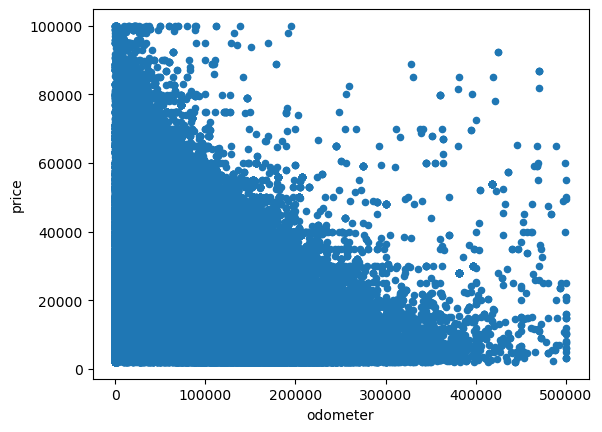

In [214]:
df.dropna(subset='odometer')[['odometer', 'price']].plot.scatter(x='odometer', y='price')

In [243]:
((df.isnull().sum() / len(df)) * 100).round(2)

year                       0.0
odometer                   0.0
condition_excellent        0.0
condition_fair             0.0
condition_good             0.0
condition_like new         0.0
condition_new              0.0
condition_salvage          0.0
fuel_diesel                0.0
fuel_electric              0.0
fuel_gas                   0.0
fuel_hybrid                0.0
fuel_other                 0.0
title_status_clean         0.0
title_status_lien          0.0
title_status_missing       0.0
title_status_parts only    0.0
title_status_rebuilt       0.0
title_status_salvage       0.0
transmission_automatic     0.0
transmission_manual        0.0
transmission_other         0.0
type_SUV                   0.0
type_bus                   0.0
type_convertible           0.0
type_coupe                 0.0
type_hatchback             0.0
type_mini-van              0.0
type_offroad               0.0
type_other                 0.0
type_pickup                0.0
type_sedan                 0.0
type_tru

<Axes: xlabel='year', ylabel='price'>

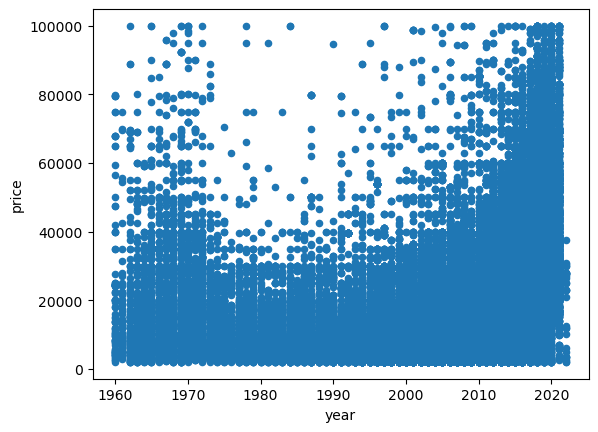

In [215]:
df.dropna(subset='year')[['year', 'price']].plot.scatter(x='year', y='price')

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [218]:
corr = df[['price', 'year', 'odometer']].corr()
corr.style.background_gradient(cmap='coolwarm')

,price,year,odometer
price,1.000000,0.434112,-0.527042
year,0.434112,1.000000,-0.398387
odometer,-0.527042,-0.398387,1.000000


In [221]:
df = pd.get_dummies(df)

In [223]:
df.isnull().sum()

price                      0
year                       0
odometer                   0
condition_excellent        0
condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
fuel_diesel                0
fuel_electric              0
fuel_gas                   0
fuel_hybrid                0
fuel_other                 0
title_status_clean         0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
transmission_automatic     0
transmission_manual        0
transmission_other         0
type_SUV                   0
type_bus                   0
type_convertible           0
type_coupe                 0
type_hatchback             0
type_mini-van              0
type_offroad               0
type_other                 0
type_pickup                0
type_sedan                 0
type_truck                 0
type_van      

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [229]:
X = df
y = df.pop('price')

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


Mean Squared Error: 88335220.630684


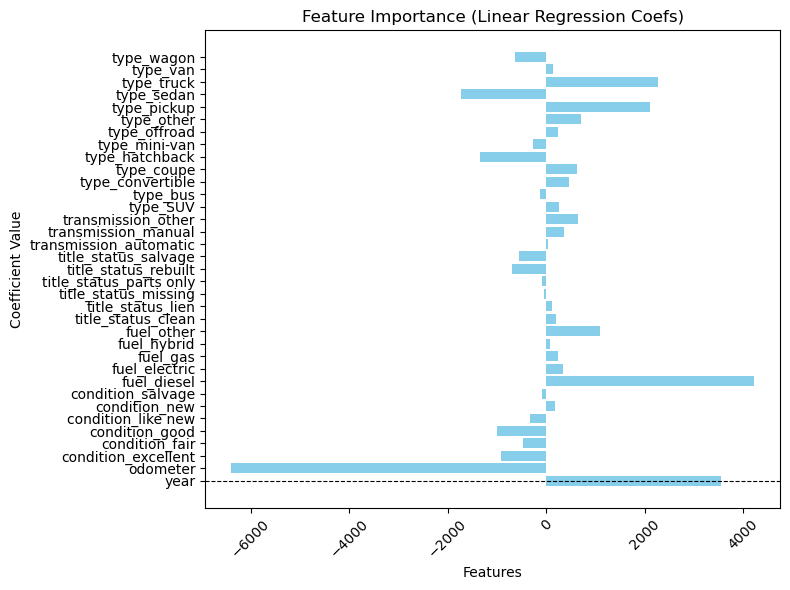

In [237]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
importance = model.coef_
y_preds = model.predict(X_test_scaled)

features_names = X.columns.tolist()

mse = mean_squared_error(y_test, y_preds)
print(f"Mean Squared Error: {mse:4f}")

coefs = model.coef_
plt.figure(figsize=(8, 6))
plt.barh(features_names, coefs, color='skyblue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Feature Importance (Linear Regression Coefs)')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Año del vehículo (year):

Cuanto más reciente el modelo, mayor es el valor. El año es el factor más influyente de todos.

Kilometraje (odometer):

A mayor uso, menor el precio. Esto confirma que los compradores valoran vehículos con menos desgaste.

Condición general:

Autos en condición "excelente" se venden por valores significativamente mayores que los que están en condiciones "buenas" o "justas".

Tipo de vehículo:

Algunos tipos como camionetas y SUVs influyen negativamente o positivamente en el precio, dependiendo de la demanda del segmento.

### 📉 Evaluation

Evaluamos el modelo utilizando una regresión lineal. El **Mean Squared Error (MSE)** fue de aproximadamente **88 millones**, lo que sugiere que el modelo capta tendencias generales pero tiene errores significativos en la predicción individual.

**Hallazgos clave:**

- `year`: Impacto positivo fuerte. Años más recientes aumentan el precio.
- `odometer`: Impacto negativo esperado. Mayor kilometraje reduce el precio.
- `condition_excellent`: También con peso positivo significativo.
- Varias variables categóricas (tipo de auto, tipo de combustible, estado del título) fueron descartadas por no aportar al modelo (coeficiente 0), lo que puede deberse a baja correlación o multicolinealidad.

**Siguiente paso sugerido**: probar modelos más complejos (como árboles de decisión o XGBoost) para mejorar el poder predictivo y capturar relaciones no lineales.


🧭 Recomendaciones para los Concesionarios
✅ Priorizar modelos recientes en buen estado (especialmente 5 años o menos y condición "excelente").

📉 Evitar vehículos con alto kilometraje, ya que impacta negativamente en el valor de reventa.

📊 No sobrevalorar detalles como el tipo de combustible o el estado del título, a menos que el cliente específico los demande.

🚗 Aprovechar tipos de vehículo populares en el mercado local, validando con datos históricos de ventas.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### 🚀 Deployment

El modelo entrenado puede ser integrado en una aplicación de valoración automática de vehículos usados.

**Formas de despliegue:**
- Un **API REST** usando `FastAPI` o `Flask` para que un front-end o app lo consuma.
- Una **interfaz web** en Streamlit para que usuarios suban sus datos y obtengan una predicción.
- Empaquetarlo como un microservicio con Docker para facilidad de escalado y despliegue en la nube (por ejemplo, en AWS o GCP).

**Consideraciones:**
- Guardar el modelo con `joblib` o `pickle` (`joblib.dump(model, 'modelo_lineal.pkl')`)
- Incluir validación de entrada para evitar datos erróneos
- Monitorizar el rendimiento en producción (drift, errores de predicción, etc.)

